# For Tweaks model
we will change **vocabulary_size, Input length, padding, and Global Average Polling**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Get datsset


In [ ]:
!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

--2023-09-14 17:47:16--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 142.251.2.139, 142.251.2.113, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kl169h9hkiv0oueugrqj2hrlmg37o4g8/1694713575000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=61fac8a9-104e-4d40-94a8-9df8f6d4e00c [following]
--2023-09-14 17:47:17--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kl169h9hkiv0oueugrqj2hrlmg37o4g8/1694713575000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=61fac8a9-104e-4d40-94a8-9df8f6d4e00c
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-08-ak

In [ ]:
dataset= pd.read_csv("/tmp/sentiment.csv")

In [ ]:
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [ ]:
sentences= dataset["text"].tolist()
labels= dataset["sentiment"].tolist()

Train text split

In [ ]:
training_set= int(len(sentences)*0.8)
training_sentences= sentences[0:training_set]
testing_sentences= sentences[training_set: ]
training_labels= labels[0: training_set]
testing_labels= labels[training_set: ]

In [ ]:
print(training_labels)

[0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 

In [ ]:
type(training_labels)

list

In [ ]:
training_labels= np.array(training_labels)
testing_labels= np.array(testing_labels)

# Tokenize Dataset

In [ ]:
vocabelary_size= 500
embeding_dim= 16
max_len= 50
trunc_type= "post"
padding_type= "post"
oov_tok= "<OOV>"

In [ ]:
tokenizer= Tokenizer(num_words= vocabelary_size, oov_token= oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index= tokenizer.word_index

In [ ]:
train_sequences= tokenizer.texts_to_sequences(training_sentences)
train_pad= pad_sequences(train_sequences, maxlen= max_len, padding= padding_type, truncating= trunc_type)

test_sequences= tokenizer.texts_to_sequences(testing_sentences)
test_pad= pad_sequences(test_sequences, maxlen= max_len, padding= padding_type, truncating= trunc_type)


In [ ]:
train_pad[1]

array([ 20,  90,  76, 364,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

Let's quickly take a look at one of the padded sequences to ensure everything above worked appropriately

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(train_pad[1]))
print(training_sentences[1])

good case excellent value ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Good case Excellent value.


# Train a Basic sentiment model with **embeddings**

In [ ]:
#note the embedding layer is the first
model= tf.keras.Sequential([
  tf.keras.layers.Embedding(vocabelary_size, embeding_dim, input_length= max_len),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(16, activation= "relu"),
  tf.keras.layers.Dense(6, activation= "relu"),
  tf. keras.layers.Dense(1, activation= "sigmoid")
])

In [ ]:
model.compile(loss= "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 6)                 102       
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8381 (32.74 KB)
Trainable params: 8381 (32.74 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [ ]:
epochs= 10
history= model.fit(train_pad, training_labels, epochs= epochs, validation_data= (test_pad, testing_labels))

Epoch 1/10
50/50 [==============================] - 0s 6ms/step - loss: 0.1565 - accuracy: 0.9410 - val_loss: 0.6850 - val_accuracy: 0.7268
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 0.1543 - accuracy: 0.9410 - val_loss: 0.6867 - val_accuracy: 0.7318
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1570 - accuracy: 0.9422 - val_loss: 0.6911 - val_accuracy: 0.7318
Epoch 4/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1528 - accuracy: 0.9404 - val_loss: 0.6855 - val_accuracy: 0.7368
Epoch 5/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1493 - accuracy: 0.9416 - val_loss: 0.7626 - val_accuracy: 0.7118
Epoch 6/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1508 - accuracy: 0.9416 - val_loss: 0.7433 - val_accuracy: 0.7218
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1449 - accuracy: 0.9441 - val_loss: 0.7426 - val_accuracy: 0.7268
Epoch 8/10
50/50 [==

# Visualize Train data

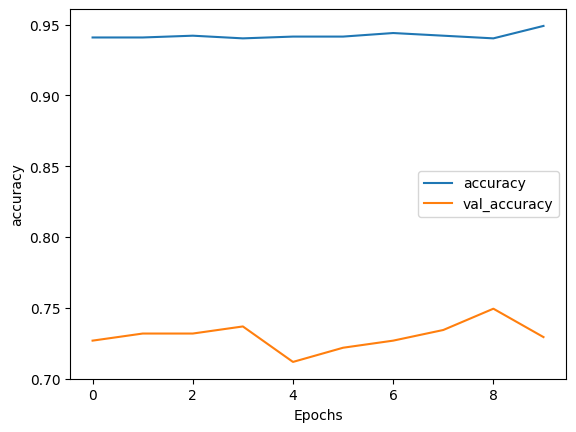

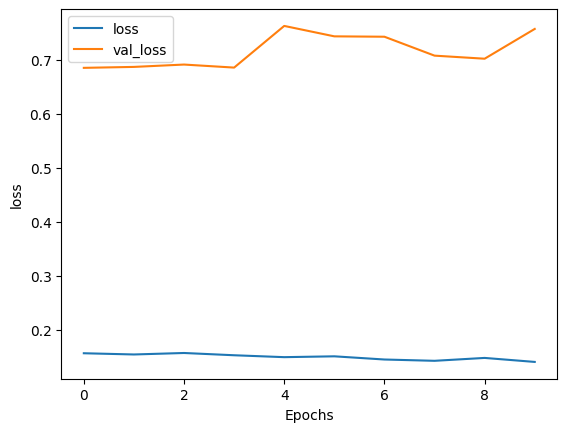

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Predicting Sentiment in New Reviews

In [ ]:
# Use the model to predict a review
fake_reviews = ['I love this phone', 'I hate spaghetti',
                'Everything was cold',
                'Everything was hot exactly as I wanted',
                'Everything was green',
                'the host seated us immediately',
                'they gave us free chocolate cake',
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes',
                'does not work when I stand on my head']

print(fake_reviews)

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']


In [ ]:
# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_len)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')


HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!



In [ ]:
classes = model.predict(fakes_padded)

1/1 [==============================] - 0s 94ms/step


In [ ]:
# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

I love this phone
[0.9961506]


I hate spaghetti
[0.01014571]


Everything was cold
[0.77675724]


Everything was hot exactly as I wanted
[0.4299112]


Everything was green
[0.77675724]


the host seated us immediately
[0.9334303]


they gave us free chocolate cake
[0.99663174]


not sure about the wilted flowers on the table
[0.00618812]


only works when I stand on tippy toes
[0.99548]


does not work when I stand on my head
[0.00442134]




# Get files for visualizing the network
The code below will download two files for visualizing how your network "sees" the sentiment related to each word. Head to http://projector.tensorflow.org/ and load these files, then click the "Sphereize" checkbox.

In [ ]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [ ]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocabelary_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>